In [406]:
import numpy as np
import pandas as pd

## Dataset collection from Kaggle. The dataset is ***Video Game Sales Dataset Updated -Extra Feat***

In [487]:
df=pd.read_csv(f"/content/sample_data/Video_Games.csv")

### 1. Inspection of dataset

In [488]:
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [489]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [490]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


### 2. Remove Duplicate Values

In [491]:
#Find games that are duplicated in the dataset
df.duplicated(["Name","Year_of_Release","Publisher","Platform"]).sum()

np.int64(2)

In [492]:
#drop those duplicated games
df.drop_duplicates(["Name","Year_of_Release","Publisher","Platform"],inplace=True)

### 3. Handle Missing values

In [493]:
#see how many values in each column are missing
df.isna().sum()

,0
Name,1
Platform,0
Year_of_Release,269
Genre,1
Publisher,54
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0
Global_Sales,0


In [494]:
#remove the rows containing missing values in names column
df.dropna(subset=["Name"], inplace=True)

In [495]:
#filling missing values in publisher with unknown
df["Publisher"]=df["Publisher"].fillna("Unknown")

In [496]:
#removing the rows of the dataset in which missing values are found in the column of release year
df.dropna(subset=["Year_of_Release"],inplace=True)

### 4. Rename columns

In [497]:
#renaming the columns to understand easily
df.rename(columns={"Name":"Game","Year_of_Release":"Release_year","NA_Sales":"North_America_sales",
                   "EU_Sales":"Europe_sales","JP_Sales":"Japan_sales"},inplace=True)

In [498]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16447 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Game                 16447 non-null  object 
 1   Platform             16447 non-null  object 
 2   Release_year         16447 non-null  float64
 3   Genre                16447 non-null  object 
 4   Publisher            16447 non-null  object 
 5   North_America_sales  16447 non-null  float64
 6   Europe_sales         16447 non-null  float64
 7   Japan_sales          16447 non-null  float64
 8   Other_Sales          16447 non-null  float64
 9   Global_Sales         16447 non-null  float64
 10  Critic_Score         7982 non-null   float64
 11  Critic_Count         7982 non-null   float64
 12  User_Score           9839 non-null   object 
 13  User_Count           7462 non-null   float64
 14  Developer            9906 non-null   object 
 15  Rating               9768 non-null   obje

### 5. Convert data types

In [499]:
#converting data types to integer
df[['Release_year','North_America_sales','Europe_sales','Japan_sales','Other_Sales','Global_Sales']] = df[['Release_year','North_America_sales','Europe_sales','Japan_sales','Other_Sales','Global_Sales']].astype(int)

### 6. Feature Engineering

In [500]:
#creating a new column top_region
df['Top_Region'] = df[['North_America_sales','Europe_sales','Japan_sales','Other_Sales']].idxmax(axis=1)


In [501]:
#creating a variable top_publisher and creating a column based on it
top_publishers = df['Publisher'].value_counts().head(10).index
df["Publisher_grouped"]=df["Publisher"].apply(lambda x:x if x in top_publishers else "Other")

In [502]:
#creating new column era based on release year column
df['Era'] = pd.cut(
    df['Release_year'],
    bins=[1980, 1990, 2000, 2010, 2020],
    labels=['80s','90s','2000s','2010s']
)

### 7. Drop unnecessary columns

In [503]:
#removing unnecessary columns for making analysis easy
df.drop(["Developer","Critic_Score","Critic_Count","User_Score","User_Count","Publisher","Rating"],axis=1,inplace=True)

## **Visualization**

In [504]:
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Scatterplot for gaming paltform available in each region

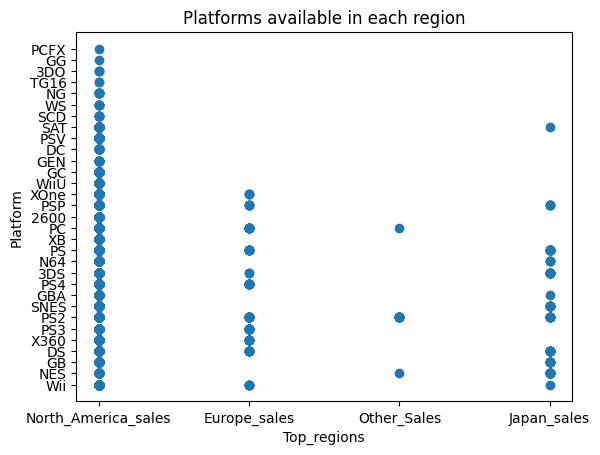

In [505]:
plt.scatter("Top_Region","Platform",data=df)
plt.title("Platforms available in each region")
plt.xlabel("Top_regions")
plt.ylabel("Platform")
plt.show()

All the gaming platforms are only available in North America region. Other regions donot support all the gaming platforms.

### 2. Histogram for Number of games per platform

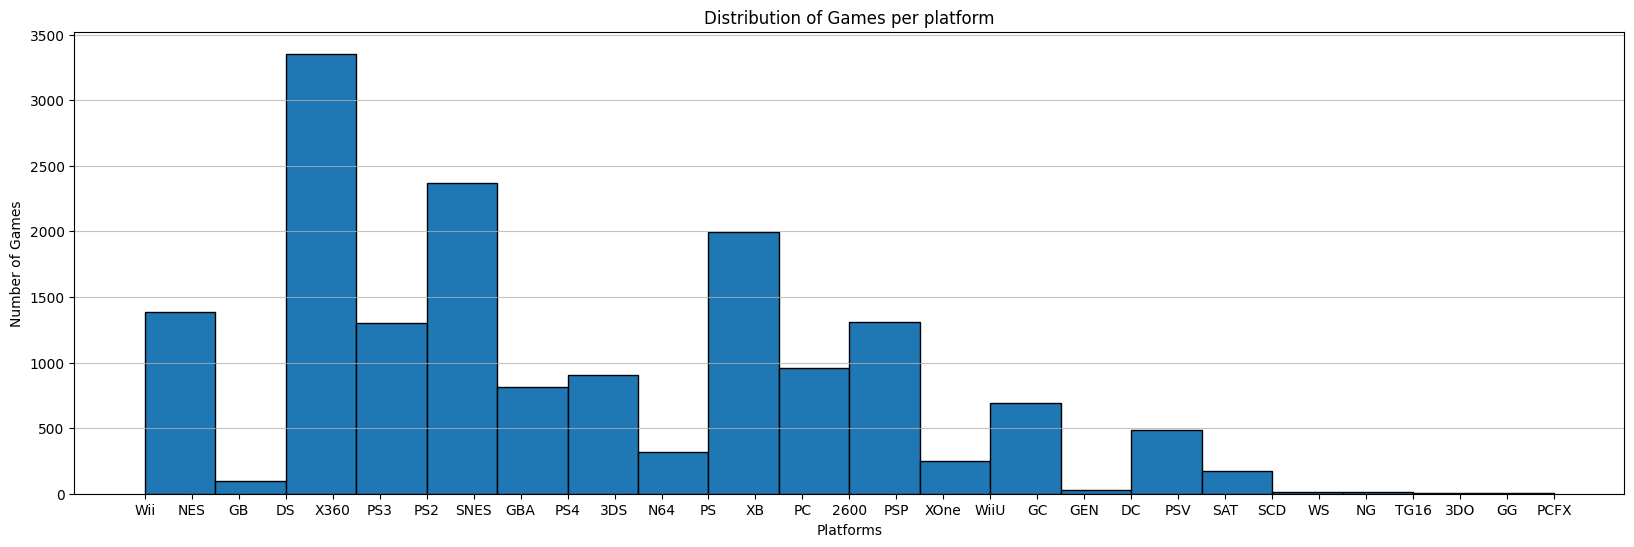

In [506]:
plt.figure(figsize=(20, 6))
plt.hist(df['Platform'], bins=20, edgecolor='black')
plt.title('Distribution of Games per platform')
plt.xlabel('Platforms')
plt.ylabel('Number of Games')
plt.grid(axis='y', alpha=0.75)
plt.show()

The most games produced are for XBox 360 platform.
second for snes gaming platform.
and third for XBox.

### 3. Piechart for Total global sales by region

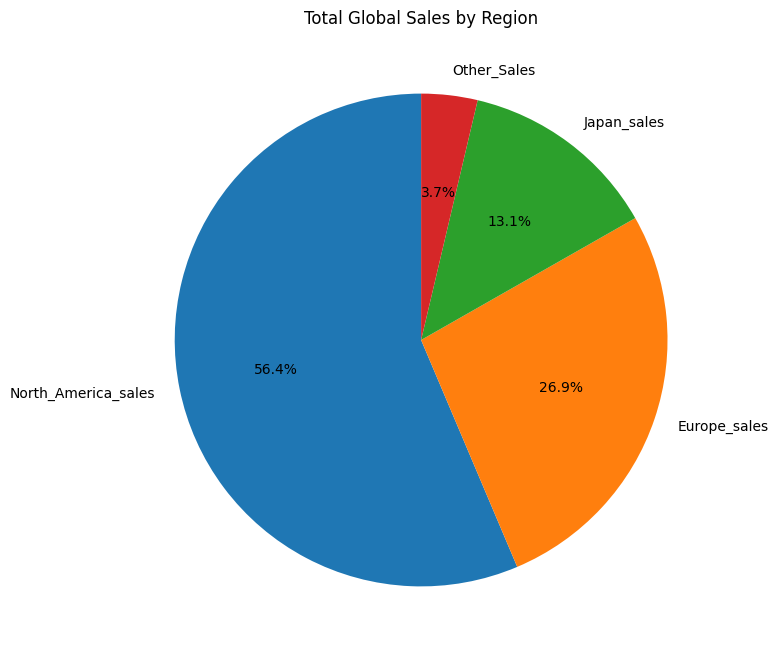

In [507]:
region_sales = df[['North_America_sales', 'Europe_sales', 'Japan_sales', 'Other_Sales']].sum()
region_names = region_sales.index

plt.figure(figsize=(8, 8))
plt.pie(region_sales, labels=region_names, autopct='%1.1f%%', startangle=90)
plt.title('Total Global Sales by Region')

plt.show()

Most sales for games was done in North America, followed by Europe, then Japan.

### 4. countplot for games released per era

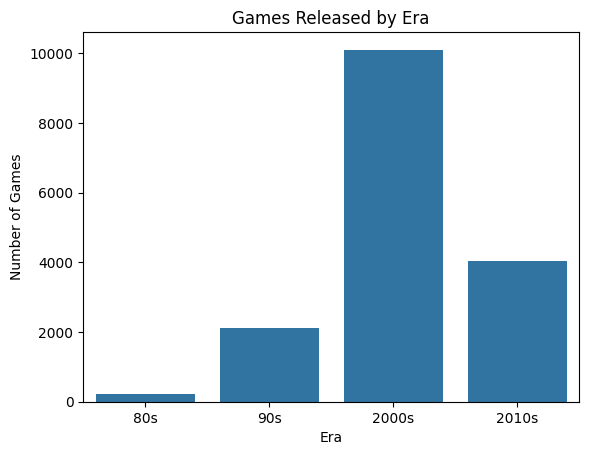

In [508]:
sns.countplot(x='Era', data=df)
plt.title("Games Released by Era")
plt.xlabel("Era")
plt.ylabel("Number of Games")
plt.show()

Most of the games were released in the 2000s year. least games produced were in the 80s.

### 5. barplot for total global sales per publisher

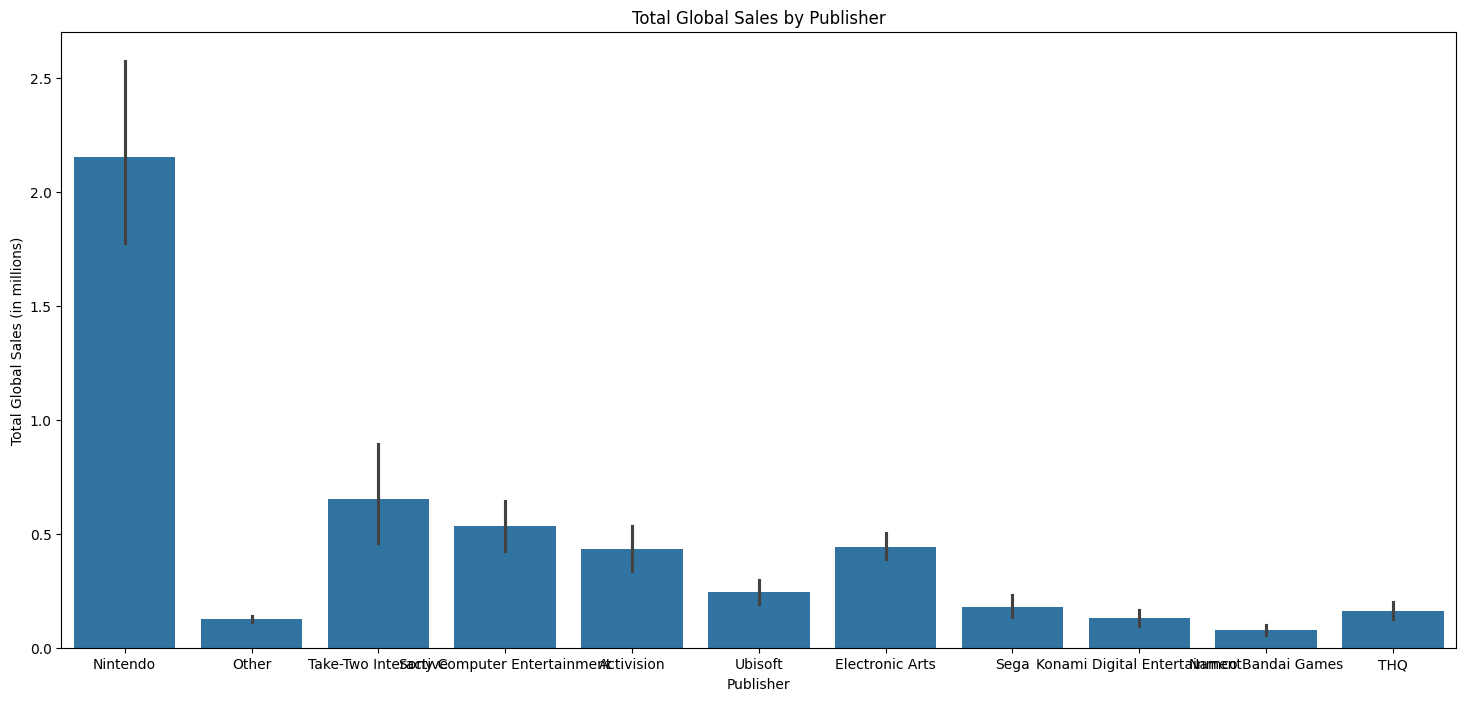

In [509]:
plt.figure(figsize=(18, 8))
sns.barplot(x='Publisher_grouped', y='Global_Sales', data=df)
plt.title("Total Global Sales by Publisher")
plt.xlabel("Publisher")
plt.ylabel("Total Global Sales (in millions)")
plt.show()

Games published by Nintendo were the most sold globally. Next was take two interactive and the third was Sony Computer entertainment.

### 6. Barplot for global sales according to Genre

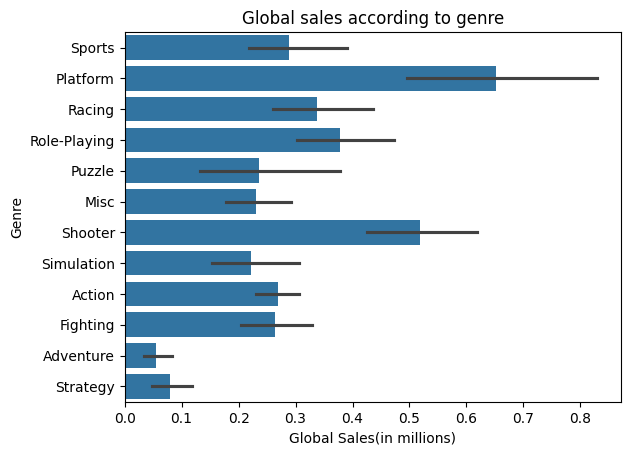

In [510]:
sns.barplot(x='Global_Sales', y='Genre', data=df)
plt.title("Global sales according to genre")
plt.xlabel("Global Sales(in millions)")
plt.ylabel("Genre")
plt.show()

Most games that were sold globally were of the genre platform; ie; platform based. second was shooter based and third was role-playing.
least sold genre was adventure.

In [432]:
# Bar chart of Global Sales by Era
#plt.figure(figsize=(10, 6))
#sales_by_era = df.groupby('Era')['Global_Sales'].sum().reset_index()
#sns.barplot(x='Era', y='Global_Sales', data=sales_by_era, palette='viridis')
#plt.title('Total Global Sales by Gaming Era')
#plt.xlabel('Gaming Era')
#plt.ylabel('Total Global Sales (in millions)')
#plt.show()